<a href="https://colab.research.google.com/github/LaptopRecai/NazalPolipler/blob/main/NazalPolipler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
image_size = (150, 150)
batch_size=20
epochs = 30

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/data", label_mode="int", image_size=image_size,
                                                             batch_size=batch_size, validation_split=0.2,
                                                             subset="training",
                                                             seed=1337)
val_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/data", label_mode="int", image_size=image_size,
                                                             batch_size=batch_size, validation_split=0.2,
                                                             subset="validation",
                                                             seed=1337)

Found 300 files belonging to 2 classes.
Using 240 files for training.
Found 300 files belonging to 2 classes.
Using 60 files for validation.


In [8]:
base = keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3)
)

base.trainable = False

inputs = keras.Input(shape=(150, 150, 3))
x = base(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)
model.summary()


9420800/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
__________________________________________________

In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Recall(), keras.metrics.Precision()],
)

In [10]:
history = keras.callbacks.History()

In [11]:
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=[history],
    batch_size=batch_size,
    validation_data=(val_ds),
    shuffle=True
)

Epoch 1/30
12/12 [==============================] - 27s 879ms/step - loss: 1.2198 - binary_accuracy: 0.4417 - recall: 0.3162 - precision: 0.4066 - val_loss: 0.9365 - val_binary_accuracy: 0.5000 - val_recall: 0.8182 - val_precision: 0.5294
Epoch 2/30
12/12 [==============================] - 5s 385ms/step - loss: 0.8042 - binary_accuracy: 0.4625 - recall: 0.5299 - precision: 0.4559 - val_loss: 0.6760 - val_binary_accuracy: 0.5333 - val_recall: 0.2121 - val_precision: 0.7778
Epoch 3/30
12/12 [==============================] - 5s 394ms/step - loss: 0.5863 - binary_accuracy: 0.6667 - recall: 0.5470 - precision: 0.7033 - val_loss: 0.4196 - val_binary_accuracy: 0.8667 - val_recall: 0.9091 - val_precision: 0.8571
Epoch 4/30
12/12 [==============================] - 6s 443ms/step - loss: 0.4635 - binary_accuracy: 0.7958 - recall: 0.8889 - precision: 0.7429 - val_loss: 0.3370 - val_binary_accuracy: 0.9000 - val_recall: 0.9091 - val_precision: 0.9091
Epoch 5/30
12/12 [=============================

In [12]:
df = pd.DataFrame.from_dict(history.history)
df

,loss,binary_accuracy,recall,precision,val_loss,val_binary_accuracy,val_recall,val_precision
0,1.219823,0.441667,0.316239,0.406593,0.936516,0.500000,0.818182,0.529412
1,0.804221,0.462500,0.529915,0.455882,0.676021,0.533333,0.212121,0.777778
2,0.586325,0.666667,0.547009,0.703297,0.419646,0.866667,0.909091,0.857143
3,0.463475,0.795833,0.888889,0.742857,0.337011,0.900000,0.909091,0.909091
4,0.394850,0.862500,0.871795,0.850000,0.285453,0.933333,0.969697,0.914286
5,0.346062,0.904167,0.974359,0.850746,0.243989,0.950000,1.000000,0.916667
6,0.316537,0.891667,0.914530,0.869919,0.222535,0.950000,1.000000,0.916667
7,0.275344,0.929167,0.982906,0.884615,0.205462,0.966667,1.000000,0.942857
8,0.251901,0.945833,0.991453,0.906250,0.191774,0.983333,1.000000,0.970588
9,0.229043,0.950000,0.991453,0.913386,0.182165,0.983333,1.000000,0.970588


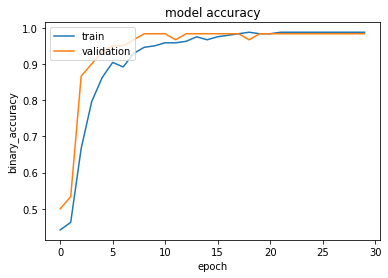

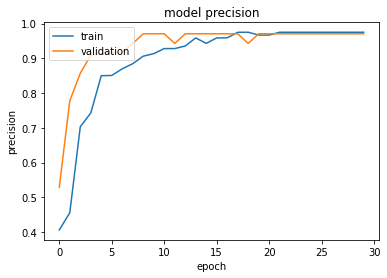

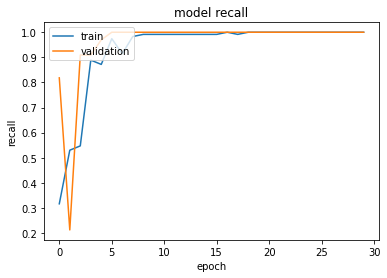

In [17]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("")
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("")
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
results = model.evaluate(val_ds)
# columns = ('BinaryAccuracy', 'Recall', 'Precision')
# rows = ['%d oranlar' % x for x in (100, 50, 20, 10, 5)]




3/3 [==============================] - 1s 279ms/step - loss: 0.1099 - binary_accuracy: 0.9833 - recall: 1.0000 - precision: 0.9706


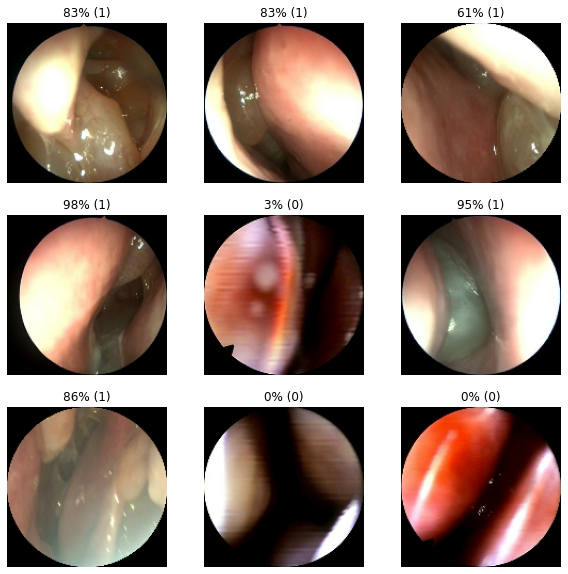

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    predicts = model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        percentage = int(predicts[i][0] * 100)
        plt.title(f'{percentage}% ({int(labels[i])})')
        plt.axis("off")

plt.show()